In [16]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [17]:
# Carregar o conjunto de dados
titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
# Verificar a quantidade de valores nulos
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
# Preencher valores ausentes da idade com a mediana
titanic['age'].fillna(titanic['age'].median(), inplace=True)

In [20]:
# Converter características categóricas em numéricas
le = LabelEncoder()
titanic['sex'] = le.fit_transform(titanic['sex'])  # Convertendo 'male' e 'female' para 0 e 1
titanic['embarked'] = le.fit_transform(titanic['embarked'].astype(str))  # Convertendo portos de embarque

In [21]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True


In [22]:
# Preencher valores ausentes de embarked com a moda
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

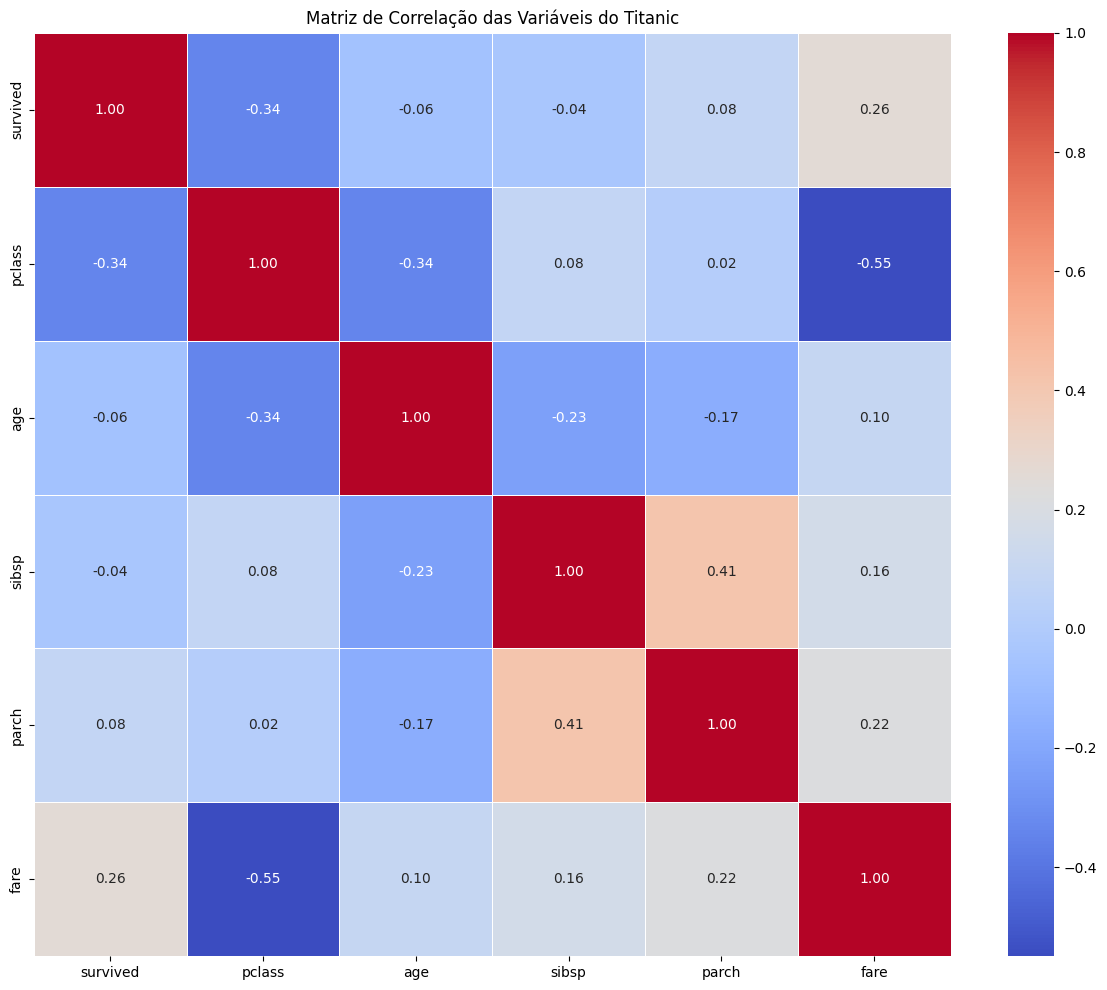

Correlação das variáveis com 'survived':
survived    1.000000
fare        0.257307
parch       0.081629
sibsp      -0.035322
age        -0.064910
pclass     -0.338481
Name: survived, dtype: float64


In [31]:
# Criar um heatmap para análise de correlação entre as variáveis
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas para a análise de correlação
colunas_numericas = titanic.select_dtypes(include=['float64', 'int64']).columns
matriz_correlacao = titanic[colunas_numericas].corr()

# Criar o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis do Titanic')
plt.tight_layout()
plt.show()

# Analisando especificamente a correlação com a variável alvo 'survived'
correlacao_com_survived = matriz_correlacao['survived'].sort_values(ascending=False)
print("Correlação das variáveis com 'survived':")
print(correlacao_com_survived)


In [23]:
# Selecionar características para o modelo
features = ['pclass', 'sex', 'age', 'fare', 'embarked']
X = titanic[features]
y = titanic['survived']

print(X.head())
print(y.head())

   pclass  sex   age     fare  embarked
0       3    1  22.0   7.2500         2
1       1    0  38.0  71.2833         0
2       3    0  26.0   7.9250         2
3       1    0  35.0  53.1000         2
4       3    1  35.0   8.0500         2
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [24]:
# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Mostrando dados sem normalização
print(X_train.head())

     pclass  sex   age     fare  embarked
331       1    1  45.5  28.5000         2
733       2    1  23.0  13.0000         2
382       3    1  32.0   7.9250         2
704       3    1  26.0   7.8542         2
813       3    0   6.0  31.2750         2


In [26]:
# Mostrando dataset normalizado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:5])

[[-1.61413602  0.7243102   1.25364106 -0.07868358  0.55744438]
 [-0.40055118  0.7243102  -0.47728355 -0.37714494  0.55744438]
 [ 0.81303367  0.7243102   0.21508629 -0.47486697  0.55744438]
 [ 0.81303367  0.7243102  -0.24649361 -0.47623026  0.55744438]
 [ 0.81303367 -1.38062393 -1.78509326 -0.02524937  0.55744438]]


In [27]:
# Mostrando a importancia de balancear os dados
print(y_train.value_counts())

survived
0    444
1    268
Name: count, dtype: int64


In [28]:
# Balancear os dados
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print(y_train_balanced.value_counts())

survived
0    444
1    444
Name: count, dtype: int64


In [29]:
# Treinar o modelo de regressão logística sem balanceamento e com balanceamento
model = LogisticRegression()
model.fit(X_train, y_train)
model_balanced = LogisticRegression()
model_balanced.fit(X_train_balanced, y_train_balanced)

LogisticRegression()

In [30]:
# Realizar previsões
predictions = model.predict(X_test)
predictions_balanced = model_balanced.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia do modelo sem balanceamento: {accuracy:.2f}')

accuracy_balanced = accuracy_score(y_test, predictions_balanced)
print(f'Acurácia do modelo com balanceamento: {accuracy_balanced:.2f}')


Acurácia do modelo sem balanceamento: 0.80
Acurácia do modelo com balanceamento: 0.82
